<h1><b>APLIKASI REGRESI</h1>
<b>DANU ADITYA FIRNANDA - 21120122120015

<h2><b>LINGKUNGAN APLIKASI</b></h2>
<p>- IPYNB Kernel : Python 3.12.0 </p>
<p>- Library :</p>
<li>pandas</li>
<li>numpy</li>
<li>matplotlib</li>
<li>scikit-learn</li>

<h2><b>IMPORT LIBRARY</h2>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit

<h2><b>INPUT DATA CSV</h2>

In [28]:
df = pd.read_csv('assets/Student_Performance.csv')
TB = df['Hours Studied']
NL = df['Sample Question Papers Practiced']
NT = df['Performance Index']
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


<h2><b>IMPLEMENTASI REGRESI LINEAR PROBLEM 2</h2>

In [21]:
# Problem 2: Metode 1 - Model Linear
X_nl = NL.values.reshape(-1, 1)
y_nt = NT.values

linear_model = LinearRegression()
linear_model.fit(X_nl, y_nt)
y_pred_linear = linear_model.predict(X_nl)
y_pred_linear

array([54.18593746, 54.47585529, 54.47585529, ..., 55.34560876,
       53.89601964, 54.18593746])

<h2><b>MENGHITUNG NILAI GALAT RMS REGRESI LINEAR</h>

In [22]:
rms_linear = np.sqrt(mean_squared_error(y_nt, y_pred_linear))
rms_linear

19.19360524526426

<h2><b>IMPLEMENTASI REGRESI EKSPONENSIAL PROBLEM 2</h2>

In [23]:
def exponential_model(x, a, b):
    return a * np.exp(b * x)

params, covariance = curve_fit(exponential_model, NL, NT)
y_pred_exp = exponential_model(NL, *params)
y_pred_exp

0       54.191302
1       54.476049
2       54.476049
3       54.476049
4       55.339298
          ...    
9995    54.476049
9996    55.339298
9997    55.339298
9998    53.908043
9999    54.191302
Name: Sample Question Papers Practiced, Length: 10000, dtype: float64

<h2><b>MENGHITUNG NILAI GALAT RMS REGRESI EKSPONENSIAL</h>

In [24]:
rms_exp = np.sqrt(mean_squared_error(NT, y_pred_exp))
rms_exp

19.19364130292259

<h2><b>IMPLEMENTASI REGRESI POLYNOMIAL PROBLEM 2</h2>

In [8]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_nl)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_nt)
y_pred_poly = poly_model.predict(X_poly)
y_pred_poly

array([54.11367922, 54.50662897, 54.50662897, ..., 55.48160397,
       53.68675042, 54.11367922])

<h2><b>MENGHITUNG NILAI GALAT RMS REGRESI POLYNOMIAL</h2>

In [9]:
rms_poly = np.sqrt(mean_squared_error(y_nt, y_pred_poly))
rms_poly

19.193206742519465

<h2><b>PLOT</h2>

<function matplotlib.pyplot.show(close=None, block=None)>

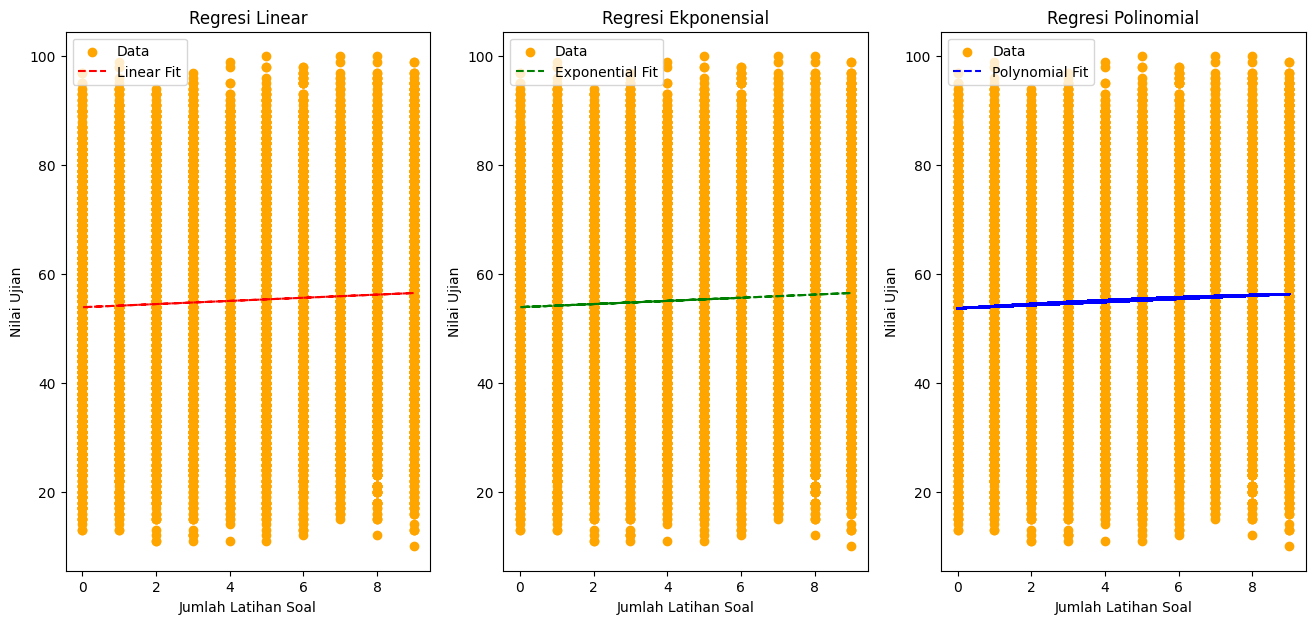

In [10]:
plt.figure(figsize=(16, 7))
plt.subplot(1,3,1)
plt.scatter(NL, NT, color='orange', label='Data')
plt.plot(NL, y_pred_linear,'--', color='Red', label='Linear Fit')
plt.title('Regresi Linear')
plt.xlabel('Jumlah Latihan Soal')
plt.ylabel('Nilai Ujian')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(NL, NT, color='orange', label='Data')
plt.plot(NL, y_pred_exp,'--', color='green', label='Exponential Fit')
plt.title('Regresi Ekponensial')
plt.xlabel('Jumlah Latihan Soal')
plt.ylabel('Nilai Ujian')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(NL, NT, color='orange', label='Data')
plt.plot(NL, y_pred_poly,'--', color='blue', label='Polynomial Fit')
plt.title('Regresi Polinomial')
plt.xlabel('Jumlah Latihan Soal')
plt.ylabel('Nilai Ujian')
plt.legend()

plt.show

<h2><b>KOMPARASI PLOT DAN RMS</h2>

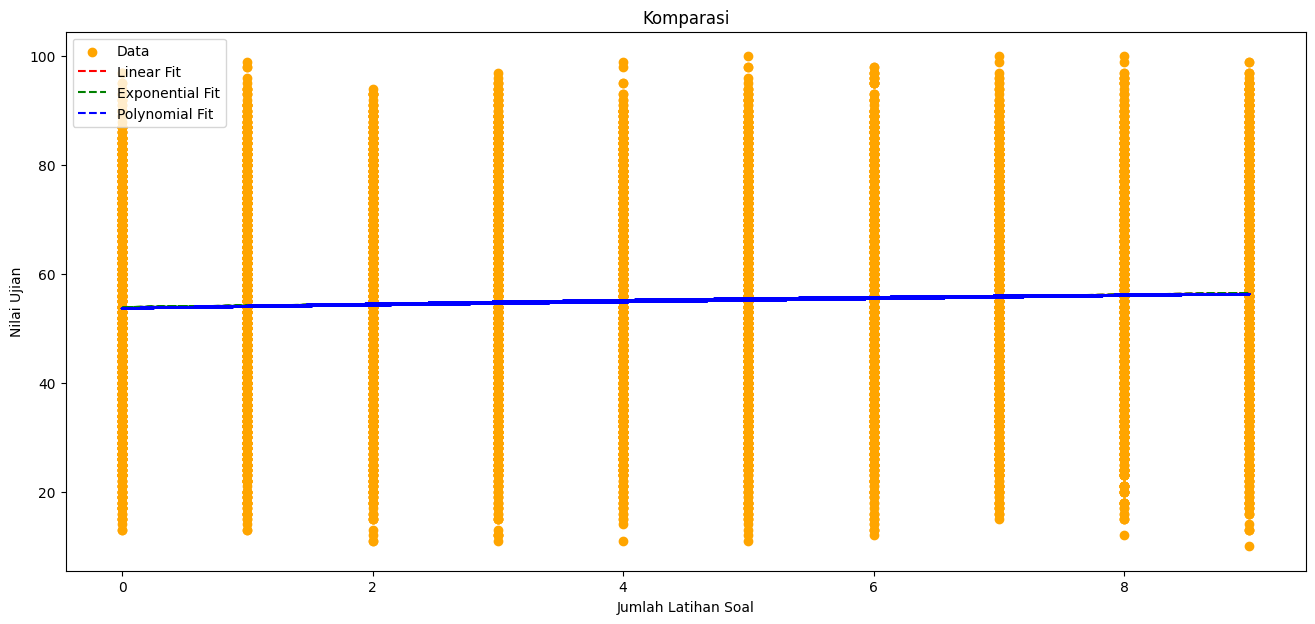

RMS Metoder Linear: 19.19360524526426
RMS Metode Eksponential : 19.19364130292259
RMS Metode Polinomial: 19.193206742519465


In [25]:
plt.figure(figsize=(16, 7))
plt.scatter(NL, NT, color='orange', label='Data')
plt.plot(NL, y_pred_linear,'--', color='Red', label='Linear Fit')
plt.plot(NL, y_pred_exp,'--', color='green', label='Exponential Fit')
plt.plot(NL, y_pred_poly,'--', color='blue', label='Polynomial Fit')
plt.title('Komparasi')
plt.xlabel('Jumlah Latihan Soal')
plt.ylabel('Nilai Ujian')
plt.legend()
plt.show()

print(f"RMS Metoder Linear: {rms_linear}")
print(f"RMS Metode Eksponential : {rms_exp}")
print(f"RMS Metode Polinomial: {rms_poly}")